
Tolerance = 0.001
  Jacobi       iterations:      4, solution: [ 3.0000225  -2.50000266  6.99998104]
  Gauss-Seidel iterations:      4, solution: [ 3.00000035 -2.50000004  6.99999999]


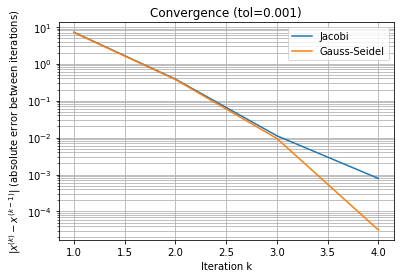


Tolerance = 1e-06
  Jacobi       iterations:      7, solution: [ 3.  -2.5  7. ]
  Gauss-Seidel iterations:      5, solution: [ 3.  -2.5  7. ]


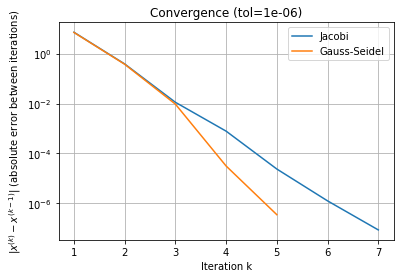


Tolerance = 1e-09
  Jacobi       iterations:      9, solution: [ 3.  -2.5  7. ]
  Gauss-Seidel iterations:      7, solution: [ 3.  -2.5  7. ]


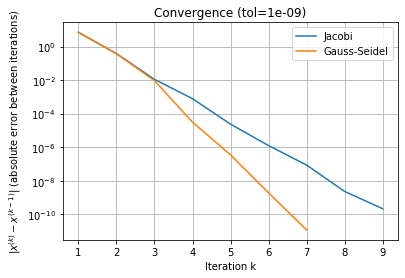

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [3.0,   -0.1,  -0.2],
    [0.1,    7.0,  -0.3],
    [0.3,   -0.2,  10.0]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

x0 = np.array([0.0, 0.0, 0.0], dtype=float)
tols = [1e-3, 1e-6, 1e-9]


def jacobi(A, b, x0, tol=1e-6, max_iter=100000, norm_type=np.inf):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x_old = np.array(x0, dtype=float)

    D = np.diag(A)
    if np.any(D == 0):
        raise ValueError("Zero on diagonal; Jacobi cannot proceed.")
    R = A - np.diagflat(D)

    xs = [x_old.copy()]
    errs = []

    for k in range(max_iter):
        x_new = (b - R @ x_old) / D
        err = np.linalg.norm(x_new - x_old, ord=norm_type)

        xs.append(x_new.copy())
        errs.append(err)

        if err < tol:
            return x_new, k + 1, np.array(xs), np.array(errs)

        x_old = x_new

    raise RuntimeError(f"Jacobi did not converge in {max_iter} iterations (last err={errs[-1]}).")


def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100000, norm_type=np.inf):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float)

    n = len(b)
    if A.shape != (n, n):
        raise ValueError("A must be square and match b length.")
    if np.any(np.diag(A) == 0):
        raise ValueError("Zero on diagonal; Gauss-Seidel cannot proceed.")

    xs = [x.copy()]
    errs = []

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            s1 = A[i, :i] @ x[:i]
            s2 = A[i, i+1:] @ x_old[i+1:]
            x[i] = (b[i] - s1 - s2) / A[i, i]

        err = np.linalg.norm(x - x_old, ord=norm_type)
        xs.append(x.copy())
        errs.append(err)

        if err < tol:
            return x, k + 1, np.array(xs), np.array(errs)

    raise RuntimeError(f"Gauss-Seidel did not converge in {max_iter} iterations (last err={errs[-1]}).")


results = {}

for tol in tols:
    xj, itj, xsj, errj = jacobi(A, b, x0, tol=tol)
    xg, itg, xsg, errg = gauss_seidel(A, b, x0, tol=tol)

    results[tol] = {
        "jacobi": {"x": xj, "iters": itj, "errs": errj},
        "gs":     {"x": xg, "iters": itg, "errs": errg},
    }

    print(f"\nTolerance = {tol:g}")
    print(f"  Jacobi       iterations: {itj:>6d}, solution: {xj}")
    print(f"  Gauss-Seidel iterations: {itg:>6d}, solution: {xg}")

    plt.figure()
    plt.semilogy(np.arange(1, len(errj) + 1), errj, label="Jacobi")
    plt.semilogy(np.arange(1, len(errg) + 1), errg, label="Gauss-Seidel")
    plt.xlabel("Iteration k")
    plt.ylabel(r"$\|x^{(k)} - x^{(k-1)}\|$ (absolute error between iterations)")
    plt.title(f"Convergence (tol={tol:g})")
    plt.legend()
    plt.grid(True, which="both")
    plt.show()


Discussion:
Smaller tolerance means you demand a smaller step-to-step change, so the solver must keep iterating longer until updates shrink below that threshold.

Jacobi typically takes more iterations than Gauss–Seidel on the same diagonally-dominant system because Gauss–Seidel uses the newest updated values immediately, which accelerates convergence.